In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import KernelPCA

PCA

In [ ]:
data = pd.read_csv('/content/diabetes.csv')

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']

# масштабируем данные
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# применяем PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

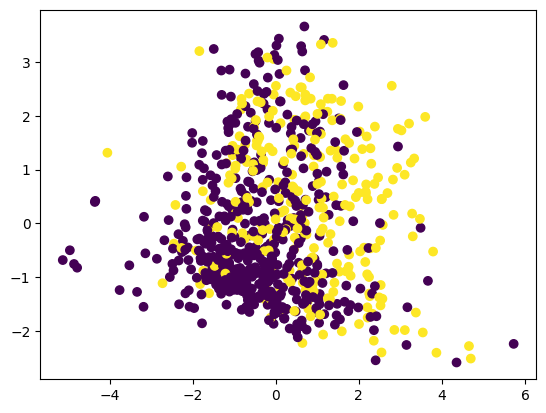

In [ ]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)

LDA

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=1, solver='svd')
X_lda = lda.fit_transform(X, y)

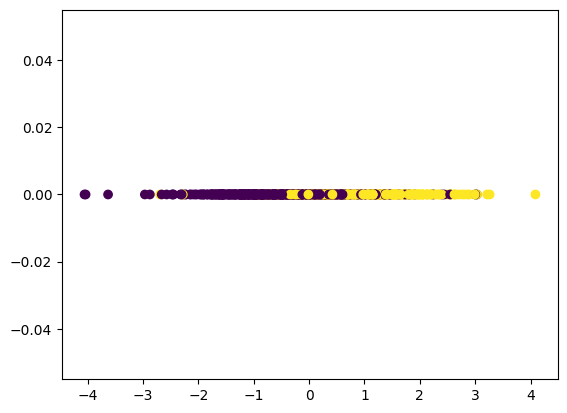

In [ ]:
plt.scatter(X_lda[:, 0], np.zeros_like(X_lda[:, 0]), c=y)

TruncatedSVD

In [ ]:
svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=0)
X_svd = svd.fit_transform(X_scaled)

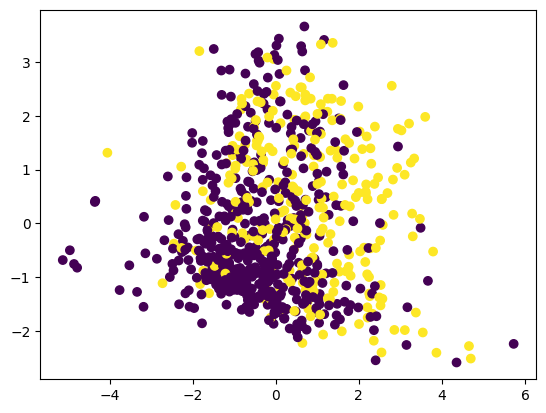

In [ ]:
plt.scatter(X_svd[:,0], X_svd[:,1], c=y)

KernelPCA ('linear','poly','rbf','sigmoid','cosine','precomputed')

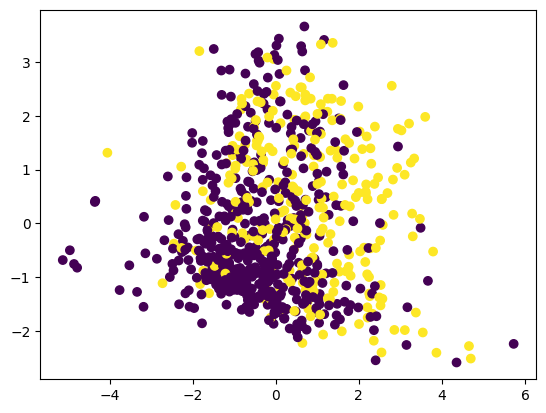

In [ ]:
kpca = KernelPCA(n_components=2, kernel='linear')
X_kpca = kpca.fit_transform(X_scaled)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)

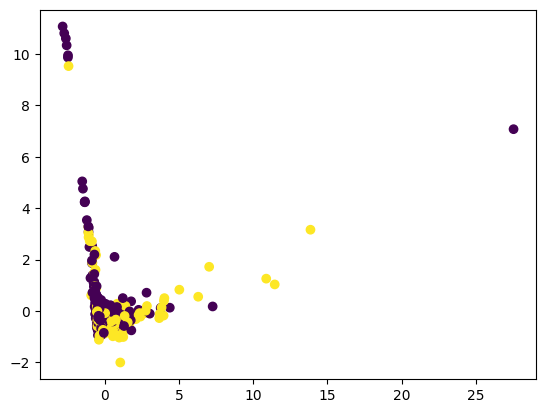

In [ ]:
kpca = KernelPCA(n_components=2, kernel='poly')
X_kpca = kpca.fit_transform(X_scaled)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)

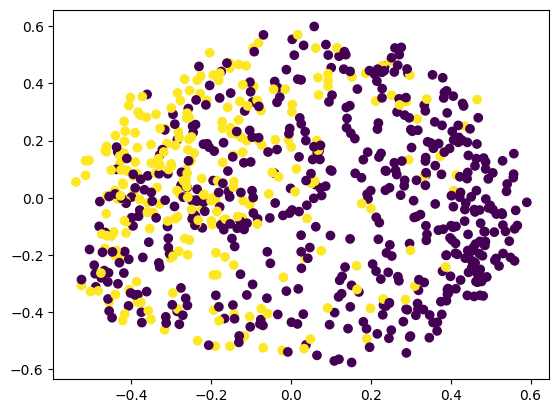

In [ ]:
kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_scaled)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)

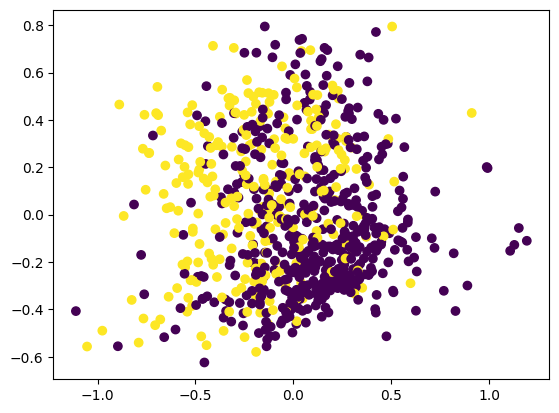

In [ ]:
kpca = KernelPCA(n_components=2, kernel='sigmoid')
X_kpca = kpca.fit_transform(X_scaled)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)

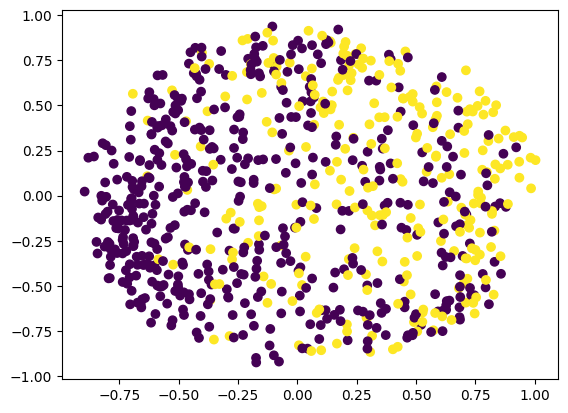

In [ ]:
kpca = KernelPCA(n_components=2, kernel='cosine')
X_kpca = kpca.fit_transform(X_scaled)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)

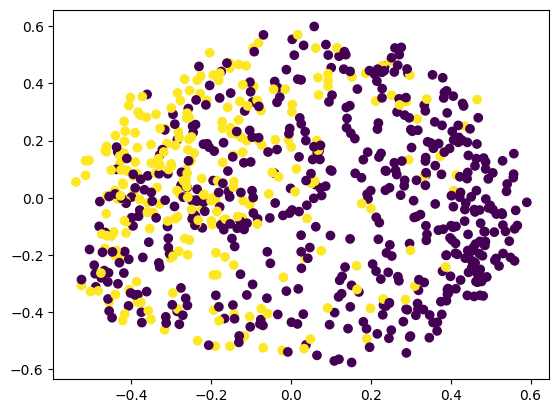

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel
K = rbf_kernel(X_scaled)

# Используем KernelPCA с предварительно вычисленным ядром
kpca = KernelPCA(n_components=2, kernel='precomputed')
X_kpca = kpca.fit_transform(K)

plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)
plt.show()